In [1]:
# ASV Relative Abundance Across Samples
#
# Author: Vanessa Brisson
# Copyright (C) 2023 Vanessa Brisson
#
# License: MIT

In [2]:
# LOAD NECESSARY PACKAGES

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# LOAD THE DATA

# this is the ANCOMBC adjusted relative abundance data

OTUdata = pd.read_csv('ProcessedSequencingData/OTUtable_ABC_RA.csv', index_col=0).transpose()
sample_data = pd.read_csv('SampleData.csv', index_col=0)
data = sample_data.merge(OTUdata.transpose(), left_index=True, right_index=True)
taxonomy = pd.read_csv('ProcessedSequencingData/TaxTable_with_labels.csv', index_col=0)
taxonomy.fillna('NA', inplace=True)
test2 = data.sort_values(['algae','metabolite','time'])
# identify ASVs with greater than 0.1% mean relative abundance
abundASVs = test2.columns[8:len(test2.columns)][np.where(np.mean(test2)[test2.columns[8:len(test2.columns)]] > 0.001)]

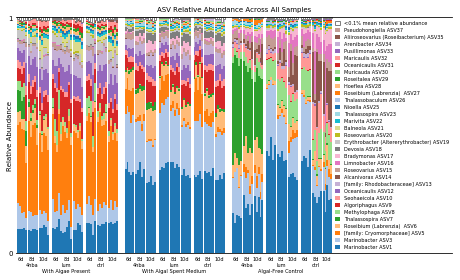

In [4]:
# PLOT RELATIVE ABUNDANCE

# set up the fityre
plt.figure(figsize=(6.5,4))
ax = plt.gca()
ax.set_prop_cycle('color', [plt.get_cmap('tab20')(1. * i/20) for i in range(20)])

# plot the stacked bar plot
x = range(test2.shape[0])
x = x + np.repeat(range(27),5)*0.5 + np.repeat(range(9),15)*1 + np.repeat(range(3),45)*2
bottom = np.zeros(test2.shape[0])
for asv in abundASVs:
    genus = taxonomy.loc[asv]['Label']
    plt.bar(x, test2[asv], bottom=bottom,width=1,
            label=genus + ' ' +asv, edgecolor='none')
    bottom += test2[asv]
plt.bar(x, 1-bottom, bottom=bottom, label='<0.1% mean relative abundance',
       color='w',edgecolor='grey')

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], 
          bbox_to_anchor=(1,0.5), loc='center right', 
          labelspacing=0.4, handlelength=1, borderpad=0,
          borderaxespad=0.5, frameon=False, fontsize=5)

# add labels and make it pretty
plt.xlim(-1,220)
plt.xticks(np.arange(27)*5+1.5 + np.arange(27)*0.5 + np.repeat(range(9),3) + np.repeat(range(3),9)*2,
          ['6d','8d\n4hba','10d','6d','8d\nlum\nWith Algae Present','10d','6d','8d\nctrl','10d',
           '6d','8d\n4hba','10d','6d','8d\nlum\nWith Algal Spent Medium','10d','6d','8d\nctrl','10d',
           '6d','8d\n4hba','10d','6d','8d\nlum\nAlgal-Free Control','10d','6d','8d\nctrl','10d'],
          fontsize=5)
plt.ylim(0,1)
plt.yticks([0,1], fontsize=7)
plt.ylabel('Relative Abundance', fontsize=7, labelpad=-5)
plt.title('ASV Relative Abundance Across All Samples', fontsize=7)

ax.tick_params(length=0)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('FigureS7.png', transparent=True, dpi=200)
plt.show()

In [5]:
# data for Table 1
ctrl_data = data.loc[data['metabolite']=='none']
matches = ctrl_data.groupby('algae').mean()[['ASV12','ASV6','ASV23','ASV34','ASV9','ASV18','ASV14','ASV1']].transpose()*100
print(matches)
print()
print('TOTALS')
print('Phaeodactylum')
print(matches['Phaeodactylum'].sum())
print('Phaeodactylum spent medium')
print(matches['Phaeodactylum spent medium'].sum())
print('none')
print(matches['none'].sum())

algae  Phaeodactylum  Phaeodactylum spent medium       none
ASV12       8.060360                    4.285737   0.247391
ASV6        2.530733                    6.752818   3.357060
ASV23       0.010846                    0.501892   0.061825
ASV34       0.019186                    0.518274   0.002699
ASV9        7.723340                    8.400540   0.115226
ASV18       0.190030                    2.533977   0.008168
ASV14       0.091003                    0.029571  11.700900
ASV1       12.209092                   33.033217  29.157496

TOTALS
Phaeodactylum
30.834590711392767
Phaeodactylum spent medium
56.05602591333241
none
44.65076434770686
